In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customers = pd.read_csv("C:/Users/Vineetha Vavilapalli/Desktop/Data analysis cv/Customers.csv")
products = pd.read_csv("C:/Users/Vineetha Vavilapalli/Desktop/Data analysis cv/Products.csv")
transactions = pd.read_csv("C:/Users/Vineetha Vavilapalli/Desktop/Data analysis cv/Transactions.csv")

In [5]:
print("Customers Dataset:")
print(customers.head())
print(customers.info())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [6]:
print("\nProducts Dataset:")
print(products.head())
print(products.info())


Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [7]:
print("\nTransactions Dataset:")
print(transactions.head())
print(transactions.info())


Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         100

In [8]:
# Data Cleaning
# Convert date fields to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [9]:
# Check for missing values
print("\nMissing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [10]:
# Merge datasets for analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [11]:
# Exploratory Data Analysis

# 1. Revenue by Region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Region:")
print(region_revenue)


Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


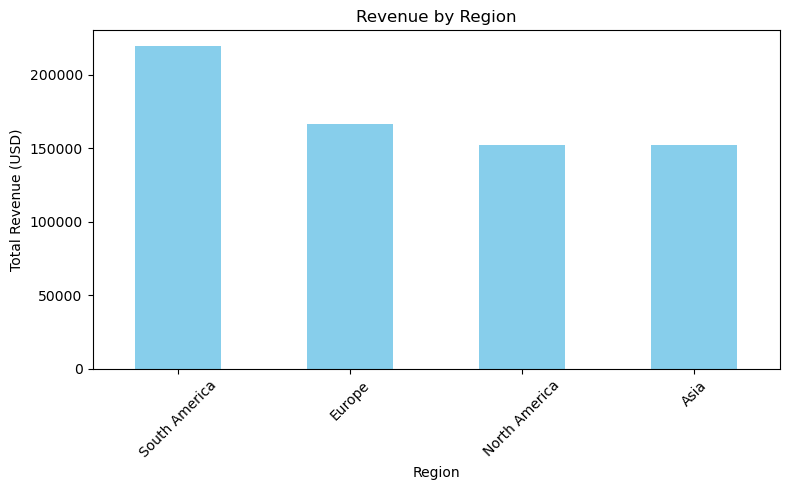

In [12]:
# Plot: Revenue by Region
region_revenue.plot(kind='bar', title='Revenue by Region', figsize=(8, 5), color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# 2. Revenue by Product Category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:")
print(category_revenue)


Revenue by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


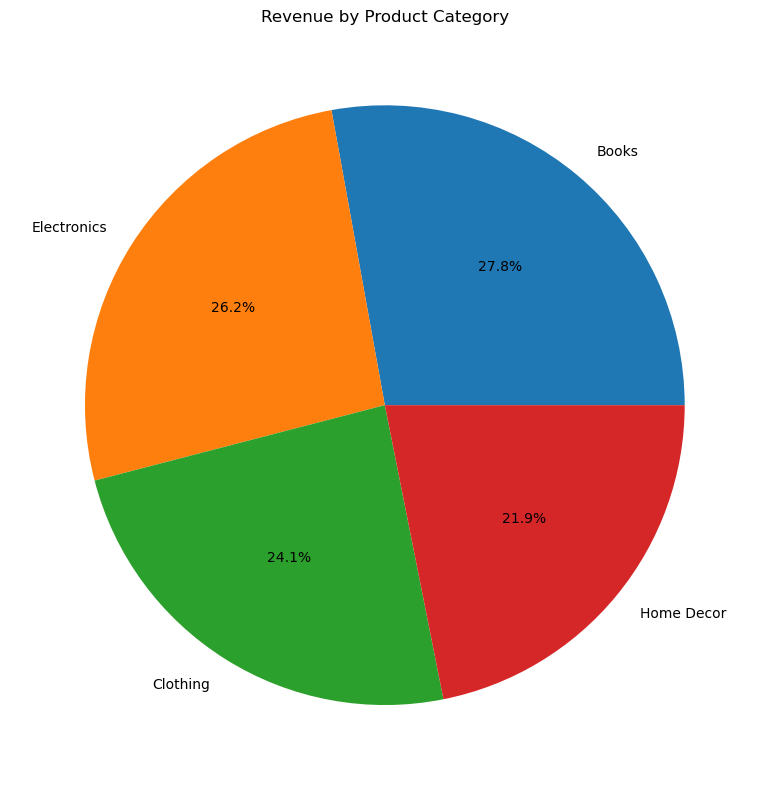

In [14]:
# Plot: Revenue by Product Category
category_revenue.plot(kind='pie', title='Revenue by Product Category', autopct='%1.1f%%', figsize=(8, 8))
plt.ylabel('')
plt.tight_layout()
plt.show()

In [15]:
# 3. Monthly Sales Trends
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
print("\nMonthly Sales Trends:")
print(monthly_sales)


Monthly Sales Trends:
Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


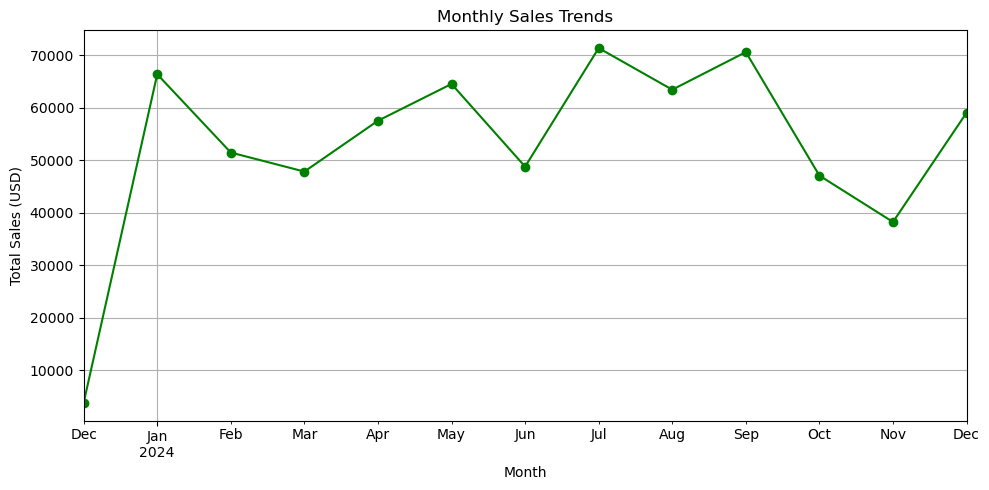

In [16]:
# Plot: Monthly Sales Trends
monthly_sales.plot(kind='line', title='Monthly Sales Trends', figsize=(10, 5), marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.tight_layout()
plt.show()

In [17]:
# 4. High-Value Customers (Top 10%)
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum()
top_10_percent = customer_revenue[customer_revenue >= customer_revenue.quantile(0.9)]
print("\nHigh-Value Customers:")
print(top_10_percent)




High-Value Customers:
CustomerID
C0013     6000.56
C0028     6819.57
C0041     6149.78
C0045     6021.80
C0054     8040.39
C0059     7073.28
C0065     7663.70
C0068     5950.42
C0082     7572.91
C0087     6604.23
C0096     6072.92
C0099     6715.72
C0102     6132.36
C0104     6579.10
C0141    10673.87
C0143     6044.63
C0156     7634.45
C0165     6708.10
C0175     6210.53
C0188     7111.32
Name: TotalValue, dtype: float64


In [19]:
# Save cleaned and merged dataset for further use
merged_data.to_csv('Merged_Transactions.csv', index=False)